In [1]:
import numpy as np

In [2]:
import os
import glob
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
from sklearn.utils import shuffle
import time
import scipy
from PIL import Image
import matplotlib.gridspec as gridspec

from keras.layers import Dense
from keras.layers import Reshape
from keras.layers.core import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Flatten
from keras.layers import Conv2D, Conv2DTranspose, Dropout

from keras.models import Model
from keras.optimizers import SGD, Adam, RMSprop
from keras.layers.advanced_activations import LeakyReLU
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.utils.vis_utils import plot_model
import keras.backend as K
K.set_image_dim_ordering('tf')

import numpy as np
from sklearn.utils import shuffle
import tensorflow as tf

from keras.backend.tensorflow_backend import set_session
from keras.layers import Input, merge
from keras.initializers import RandomNormal
K.set_image_dim_ordering('tf')

config = tf.ConfigProto()
config.gpu_options.allow_growth = True 
set_session(tf.Session(config=config))

from collections import deque

Using TensorFlow backend.


In [23]:
# A function to normalize image pixels.
def norm_img(img):
    '''A function to Normalize Images.
    Input:
        img : Original image as numpy array.
    Output: Normailized Image as numpy array
    '''
    img = (img / 127.5) - 1
    return img

def denorm_img(img):
    '''A function to Denormailze, i.e. recreate image from normalized image
    Input:
        img : Normalized image as numpy array.
    Output: Original Image as numpy array
    '''
    img = (img + 1) * 127.5
    return img.astype(np.uint8) 

def sample_from_dataset(batch_size, image_shape, data_dir=None):
    '''Create a batch of image samples by sampling random images from a data directory.
    Resizes the image using image_shape and normalize the images.
    Input:
        batch_size : Sample size required
        image_size : Size that Image should be resized to
        data_dir : Path of directory where training images are placed.

    Output:
        sample : batch of processed images 
    '''
    sample_dim = (batch_size,) + image_shape
    sample = np.empty(sample_dim, dtype=np.float32)
    all_data_dirlist = list(glob.glob(data_dir))
    sample_imgs_paths = np.random.choice(all_data_dirlist,batch_size)
    for index,img_filename in enumerate(sample_imgs_paths):
        image = Image.open(img_filename)
        image = image.resize(image_shape)
        image = image.convert('1')
        image = np.asarray(image)
        image = norm_img(image)
        sample[index,...] = image
    return sample

In [46]:
batch_size = 64
image_shape = (150,150)
data_dir = "images/source_images/road_images/*"

In [47]:
sample_dim = (batch_size,) + image_shape

In [48]:
array = np.empty(sample_dim, dtype=np.float32)

In [49]:
array.shape

(64, 150, 150)

In [52]:
all_data_dirlist = list(glob.glob(data_dir))
sample_imgs_paths = np.random.choice(all_data_dirlist,2)

In [53]:
sample_imgs_paths

array(['images/source_images/road_images/22978855_15.jpg',
       'images/source_images/road_images/11278660_15.jpg'], dtype='<U48')

In [54]:
enumerate(sample_imgs_paths)

In [55]:
img_filename = sample_imgs_paths

In [56]:
img_filename

array(['images/source_images/road_images/22978855_15.jpg',
       'images/source_images/road_images/11278660_15.jpg'], dtype='<U48')

In [57]:
img_filename[0]

'images/source_images/road_images/22978855_15.jpg'

In [58]:
image = Image.open(img_filename[0])

In [59]:
image_array = np.asarray(image)

In [60]:
image_array.shape

(1500, 1500)

In [61]:
image_shape

(150, 150)

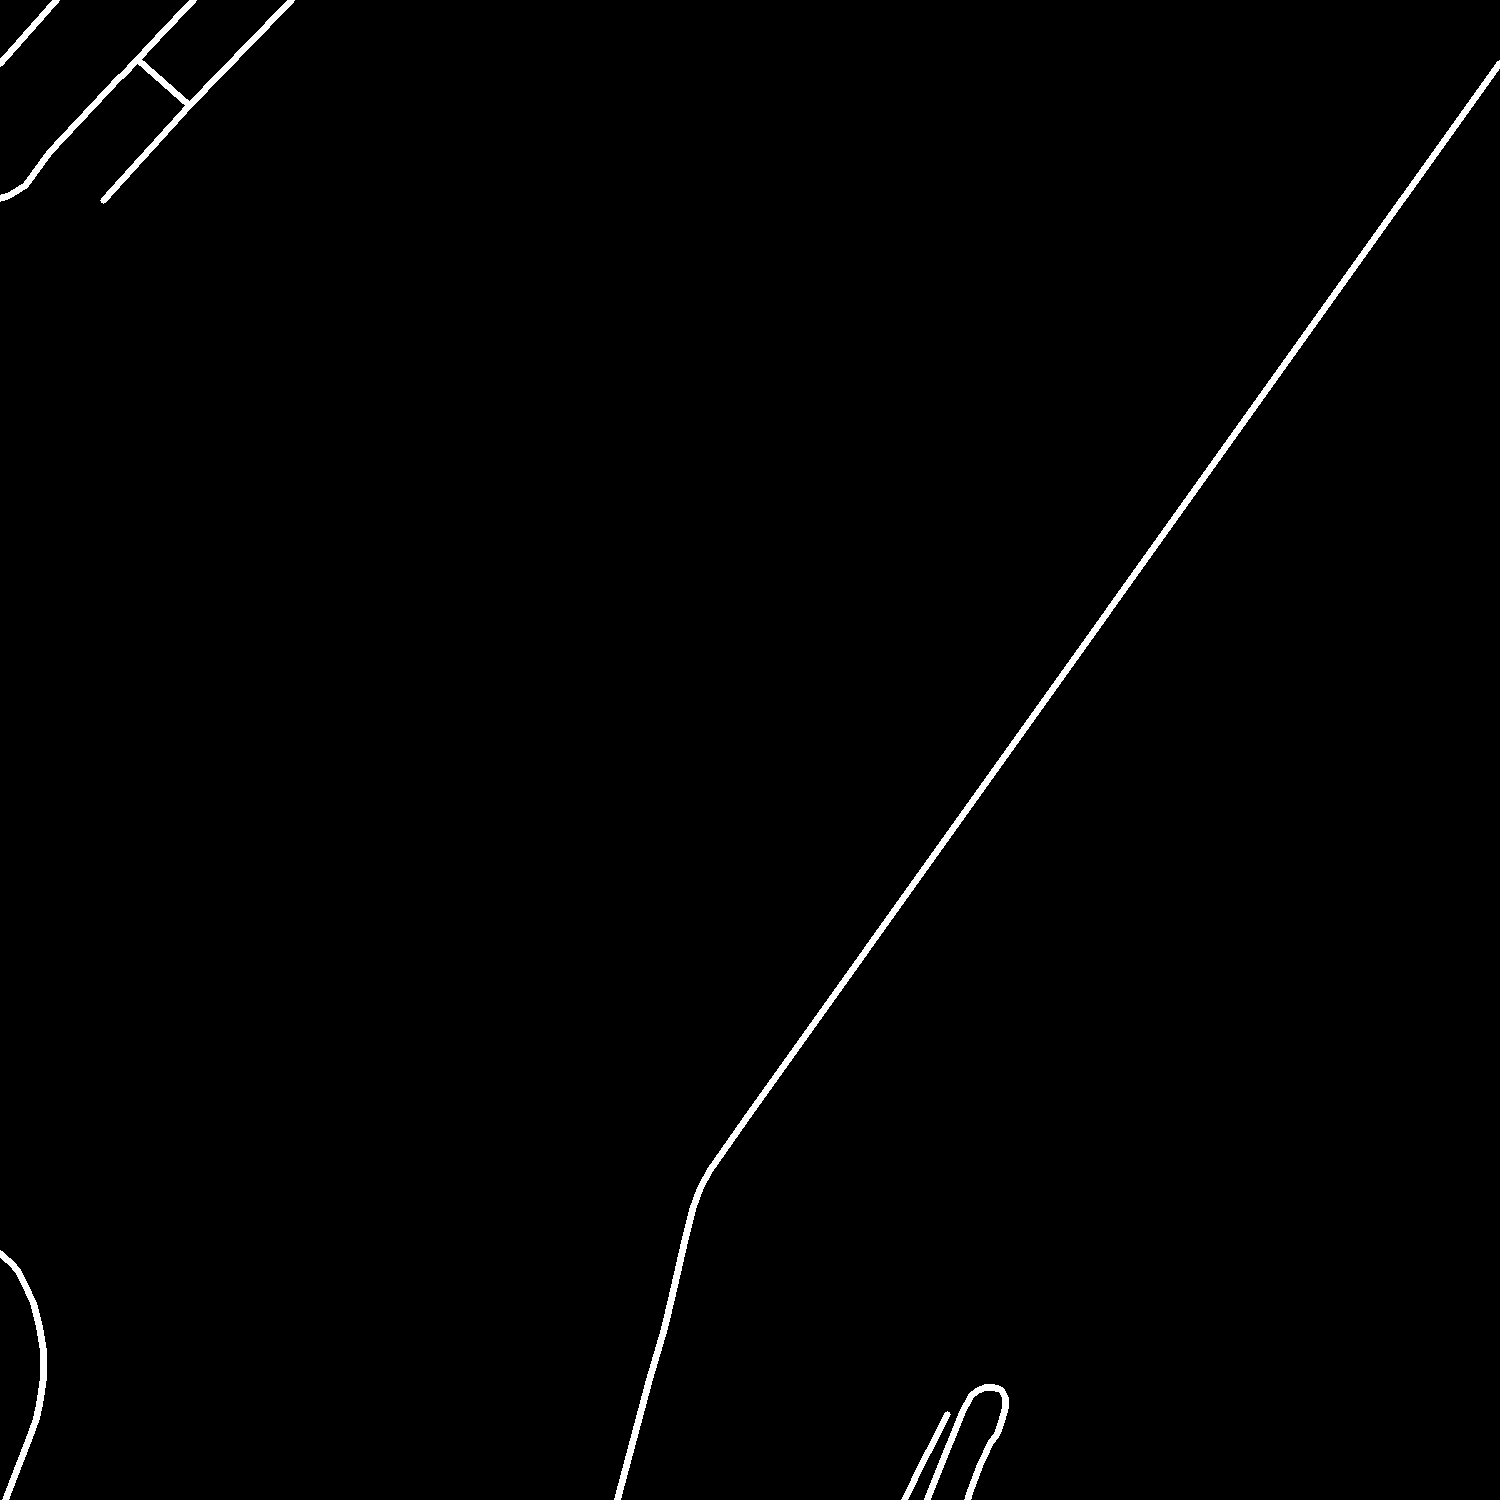

In [72]:
image = Image.open(img_filename[0])
image

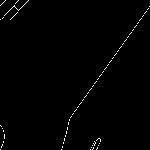

In [73]:
image = image.resize(image_shape)
image

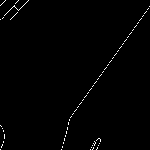

In [74]:
image = image.convert('1')
image

In [75]:
image = np.asarray(image)
image

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False]])

In [76]:
image.shape

(150, 150)

In [77]:
image = norm_img(image)
image

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       ...,
       [-1.        , -0.99215686, -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-0.99215686, -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ]])

In [78]:
image.shape

(150, 150)

In [79]:
sample_dim = (batch_size,) + image_shape
sample = np.empty(sample_dim, dtype=np.float32)

In [80]:
sample[index,...] = image

NameError: name 'index' is not defined

In [81]:
sample_from_dataset(batch_size, image_shape, data_dir=data_dir)

array([[[-1.        , -1.        , -1.        , ..., -1.        ,
         -1.        , -1.        ],
        [-1.        , -1.        , -1.        , ..., -1.        ,
         -1.        , -1.        ],
        [-1.        , -1.        , -1.        , ..., -1.        ,
         -1.        , -1.        ],
        ...,
        [-1.        , -1.        , -1.        , ..., -1.        ,
         -1.        , -1.        ],
        [-1.        , -1.        , -1.        , ..., -1.        ,
         -1.        , -1.        ],
        [-1.        , -1.        , -1.        , ..., -1.        ,
         -1.        , -1.        ]],

       [[-1.        , -0.99215686, -1.        , ..., -1.        ,
         -1.        , -1.        ],
        [-1.        , -1.        , -1.        , ..., -1.        ,
         -1.        , -1.        ],
        [-1.        , -1.        , -1.        , ..., -1.        ,
         -1.        , -1.        ],
        ...,
        [-1.        , -1.        , -1.        , ..., -